# Food Inflation Rates

Created by: Ryan Birmingham, Jonathan Chu, Jalen Murray

# Introduction

In the below tutorial, we will be showing how the U.S Urban Food Inflation rate is affected by various types of categories. These categories include individual food items, the cost of labor, the prices of energy used in the food process, the conversion rate of the USD, and the U.S interest rate. The reason that each of these categories were picked is because they play a significant role in the inflation of food in urban communities. Our group decided to choose this topic because it relates to our living situation. Our group members live in College Park, Maryland during the year which is considered an urban city. When creating a budget for college, it is important to note how certain increases in prices will affect our spending on food. This data can also benefit those who live in urban cities. The increase in Food Inflation rates can determine how one's budget for the week will be distributed. Due to this, it is important that the U.S urban food inflation rate can be predicted so that someone knows how to prepare for the future. 

Below I will explain the categories and why we choose them. 

We choose the individual food prices of popular items because we wanted to see how each item affected the overall food inflation rate. We found this to be significant because individual food prices increasing or decreasing can be informative to why the food inflation rate is increasing or decreasing. 

Next, we choose the minimum wage as a factor of food inflation because we think that the cost of labor will be significant in the inflation rate of food increasing. This was concluded because if worker salaries are increased, then businesses have to accommodate for that increase. We believe that businesses will accommodate for this by raising the prices of foods which increase the inflation rate. The reason that we added the federal minimum wage in 2020 dollars was because we thought the data would be interesting with inflation in comparison to only using the federal minimum wage which only increases. 

Energy has a large role in the rate of food inflation. In our tutorial, we choose to focus on the cost of gas and electricity. Some examples of energy being used include transporting food goods via ship and truck and preserving the food. 

The conversion rate of USD to other exchange rates would lead to a change in food inflation. The change in food inflation would be because of the rise or fall in conversion of the USD to other currencies. A lot of the food items that we import come for other countries such as Mexico and Canada which is why we choose those two countries. We wanted to see if the conversion rate fluctuation plays a role in the increase or decrease of food inflation rates.

The interest rates compared to food inflation can be explained in the following article:

https://www.cnbc.com/select/how-do-increasing-interest-rates-affect-inflation/ 

### Installing and Importing of Things

Below is the importations of Python libraries. These libraries are used for various things such as collecting, manipulating, and graphing our data to name a few. 

In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Imports for Collecting Data

import numpy as np 
import pandas as pd
import re
import sqlite3

# Imports for displaying the data
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning and filling in missing data
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

# Hypothesis testing
import statsmodels.formula.api as smf

# Data Collecting

### Converting CSV Files to Dataframes

Below is the collecting of our data. We sourced our data from the Bureau of Labor Statistics From the years 1980 to 2022. Each part of the data is read in from a .csv file and stored in a data frame. 

This text box contains the links to the data where we got our statistics

Food and Energy Prices: https://data.bls.gov/cgi-bin/surveymost?ap

Food CPI: https://data.bls.gov/cgi-bin/surveymost?cu

Information Explaining What a CPI is: https://www.bls.gov/cpi/

Interest Rates: https://www.kaggle.com/datasets/ulrikthygepedersen/real-interest-rate

Minimum Wage: https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017?resource=download

USD/CAD: https://www.investing.com/currencies/usd-cad-historical-data

USD/MXN: https://www.investing.com/currencies/usd-mxn-historical-data

In [ ]:
# Price of Electricity per KWH
Electricity_per_KWH_df = pd.read_csv('Electricity.csv', header = None) 
# Price of Gasoline, all types, per gallon / 3.785 liters
Gasoline_df = pd.read_csv('Gasoline.csv', header = None)
# Price of Bacon sliced, per lb. 
Bacon_df = pd.read_csv('Bacon.csv', header = None)
# Price of Bananas, per lb. 
Bananas_df = pd.read_csv('Bananas.csv', header = None)
# Price of Bread, white, pan, per lb. 
Bread_df = pd.read_csv('Bread.csv', header = None)
# Price of Chicken, fresh, whole, per lb. 
Chicken_df =  pd.read_csv('Chicken.csv', header = None)
# Price of Coffee, 100%, ground roast, all sizes, per lb.
Coffee_df = pd.read_csv('Coffee.csv', header = None)
# Price of Eggs, grade A, large, per doz. 
Eggs_df = pd.read_csv('Eggs.csv', header = None)
# Price of Flour, white, all purpose, per lb.
Flour_df = pd.read_csv('Flour.csv', header = None)
# Price of Oranges, Navel, per lb. 
Oranges_df = pd.read_csv('Oranges.csv', header = None) 
# Price of Rice, white, long grain, uncooked, per lb. 
Rice_df = pd.read_csv('Rice.csv', header = None)
# Price of Tomatoes, field grown, per lb. 
Tomatoes_df = pd.read_csv('Tomatoes.csv', header = None)
# Minimum wage in U.S
Minimum_wage_df = pd.read_csv('MinimumWageData.csv', header = 0)
# USD to CAD exchange rate
USD_CAD_df = pd.read_csv('USD_CAD.csv', header=0)
# USD to MXN exchange rate
USD_MXN_df = pd.read_csv('USD_MXN.csv', header=0)
# US Interest Rate
Interest_Rates_df = pd.read_csv('Interest_Rates.csv')
# CPI of Food in Urban U.S Cities
CPI_Food = pd.read_csv('CPI.csv',header = None)

#The following code displays what the dataframe looks like without cleaning. The data shown
# below is what the first 15 rows of the data look like
print(Gasoline_df.iloc[0:15])

                                                0   \
0   CPI Average Price Data, U.S. city average (AP)   
1                              Original Data Value   
2                                              NaN   
3                                       Series Id:   
4                                    Series Title:   
5                                            Area:   
6                                            Item:   
7                                           Years:   
8                                              NaN   
9                                             Year   
10                                            1980   
11                                            1981   
12                                            1982   
13                                            1983   
14                                            1984   

                                                   1      2      3      4   \
0                                                 NaN    

### Cleaning of Data

In [ ]:
# In this code block, the minimum wage data frame will have all columns removed except for 
# the year column and the federal minimum wage column.

# Keeping only the year and the federal minimum wage columns
Minimum_wage_df = Minimum_wage_df[['Year','Federal.Minimum.Wage', 'Federal.Minimum.Wage.2020.Dollars']]

# Deleting all years that are not unique
Minimum_wage_df = Minimum_wage_df.drop_duplicates(subset = 'Year')
print(Minimum_wage_df.head())

     Year  Federal.Minimum.Wage  Federal.Minimum.Wage.2020.Dollars
0    1968                  1.15                               8.55
54   1969                  1.15                               8.11
108  1970                  1.30                               8.67
162  1971                  1.30                               8.30
216  1972                  1.60                               9.90


In [ ]:
# Removing all columns except for the year, country name, and value column
Interest_Rates_df = Interest_Rates_df[['country_name', 'year', 'value']]

# Remove all rows except for the US Rows
Interest_Rates_df = Interest_Rates_df[Interest_Rates_df['country_name'] == 'United States']

#Drop the country_name column and change the name for the value column 
Interest_Rates_df = Interest_Rates_df[['year', 'value']]
Interest_Rates_df.rename(columns={'year': 'Year', 'value': 'US_Interest_Rate'}, inplace=True)
print(Interest_Rates_df.head())

      Year  US_Interest_Rate
4163  1961          3.107885
4164  1962          3.215346
4165  1963          3.374882
4166  1964          2.951669
4167  1965          2.565913


In [ ]:
# Below is the data cleaner function. The purpose of the function is to remove 
# the first 9 rows of the data, reset the data index, and then remove the years from 2021
# to 2023 because that data would not work when combining with our other data. 
#The function works by taking in a  dataframe and then returning one after the cleaning


def data_cleaner (input_df):
    # Different adjustments for CPI data

    input_df = input_df.iloc[9:] # Remove first 9 rows
    input_df = input_df.reset_index(drop = True) # Resets index
    input_df = input_df.head(input_df.shape[0] - 1) # Removes last row for consistency
    return input_df

def cpi_cleaner(input_df):
    input_df = input_df.iloc[11:]
    input_df = input_df.reset_index(drop = True)
    input_df = input_df.head(input_df.shape[0] - 1) # Removes last row for consistency
    return input_df

In [ ]:
# The dataframes created below run the raw CSV CSI data frame through the 
# cpi_cleaner function

CPI_Food_df = cpi_cleaner(CPI_Food)

# The print statement prints the top 5 values of the CPI_Food_df
print(CPI_Food_df.head())

     0      1      2      3      4      5      6      7      8      9      10  \
0  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
1  1990  130.4  131.3  131.5  131.3  131.3  132.0  132.7  132.9  133.2  133.6   
2  1991  135.8  135.5  135.8  136.7  136.8  137.2  136.5  136.0  136.0  135.8   
3  1992  137.2  137.5  138.1  138.1  137.4  137.4  137.2  138.0  138.5  138.3   
4  1993  139.8  139.9  140.1  140.6  141.1  140.4  140.3  140.8  141.1  141.6   

      11     12     13     14  
0    Nov    Dec  HALF1  HALF2  
1  134.0  134.2  131.3  133.4  
2  136.2  136.7  136.3  136.2  
3  138.3  138.7  137.6  138.2  
4  141.9  142.7  140.3  141.4  


In [ ]:
# The below functions run the update the dataframes using the data_cleaner function

Electricity_per_KWH_df = data_cleaner(Electricity_per_KWH_df)
Gasoline_df = data_cleaner(Gasoline_df)
Bacon_df = data_cleaner(Bacon_df)
Bananas_df = data_cleaner(Bananas_df)
Bread_df = data_cleaner(Bread_df)
Chicken_df = data_cleaner(Chicken_df)
Coffee_df = data_cleaner(Coffee_df)
Eggs_df = data_cleaner(Eggs_df)
Flour_df = data_cleaner(Flour_df)
Oranges_df = data_cleaner(Oranges_df)
Rice_df = data_cleaner(Rice_df)
Tomatoes_df = data_cleaner(Tomatoes_df)

# The print statement prints the top 5 values of the Gasoline_df
print(Gasoline_df.head())

     0      1      2      3      4      5      6      7      8      9      10  \
0  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
1  1980  1.110  1.186  1.230  1.242  1.244  1.246  1.247  1.243  1.231  1.223   
2  1981  1.269  1.353  1.388  1.381  1.370  1.362  1.353  1.348  1.358  1.353   
3  1982  1.341  1.318  1.268  1.210  1.224  1.296  1.318  1.310  1.292  1.280   
4  1983  1.214  1.170  1.135  1.198  1.243  1.261  1.272  1.269  1.257  1.239   

      11     12  
0    Nov    Dec  
1  1.222  1.231  
2  1.351  1.348  
3  1.268  1.244  
4  1.224  1.215  


In [ ]:
# The below function will take a dataframe and the name of the data frame as input and return 
# a new data frame that contains the yearly averages for the dollar amount of each item
def convert_yearly_avg(input_df, item_name):
    month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
    }

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # Rename 0th column to 'Year' and the rest to the name of the months
    input_df = input_df.rename(columns={0: 'Year'})
    input_df = input_df.rename(columns=month_dict)
    input_df = input_df.drop(0)
    input_df = input_df.reset_index(drop=True)
    input_df['Year'] = input_df['Year'].astype(int)
    input_df[months] = input_df[months].apply(pd.to_numeric, errors='coerce')
    column_name = f"{item_name}_Yearly_avg"
    input_df[column_name] = input_df[months].mean(axis=1) 
    input_df[column_name] = input_df[column_name].round(3)
    # Retain only 'Year', months, and the new column
    cols_to_retain = ['Year'] + [column_name]
    input_df = input_df[cols_to_retain]

    return input_df

In [ ]:
# Converting the data of each group to a yearly average using the convert_yearly_avg function

Bacon_yearly_avg = convert_yearly_avg(Bacon_df, "Bacon")
Gasoline_yearly_avg = convert_yearly_avg(Gasoline_df, "Gasoline")
Bananas_yearly_avg = convert_yearly_avg(Bananas_df, "Bananas")
Electricity_yearly_avg = convert_yearly_avg(Electricity_per_KWH_df, "Electricity")
Bread_yearly_avg = convert_yearly_avg(Bread_df, "Bread")
Chicken_yearly_avg = convert_yearly_avg(Chicken_df, "Chicken")
Coffee_yearly_avg = convert_yearly_avg(Coffee_df, "Coffee")
Eggs_yearly_avg = convert_yearly_avg(Eggs_df, "Eggs")
Flour_yearly_avg = convert_yearly_avg(Flour_df, "Flour")
Rice_yearly_avg = convert_yearly_avg(Rice_df, "Rice")
Tomatoes_yearly_avg = convert_yearly_avg(Tomatoes_df, "Tomatoes")
CPIFood_yearly_avg = convert_yearly_avg(CPI_Food_df, "Food CPI")

print(Tomatoes_yearly_avg.head())
print(CPIFood_yearly_avg.head())
print(CPIFood_yearly_avg.columns)

   Year  Tomatoes_Yearly_avg
0  1980                0.674
1  1981                0.770
2  1982                0.739
3  1983                0.784
4  1984                0.807
   Year  Food CPI_Yearly_avg
0  1990              132.367
1  1991              136.250
2  1992              137.892
3  1993              140.858
4  1994              144.275
Index(['Year', 'Food CPI_Yearly_avg'], dtype='object')


In [ ]:
# List of averages in perparation of merging

avgs_list = [Gasoline_yearly_avg,Bananas_yearly_avg,Electricity_yearly_avg,Bread_yearly_avg,
Chicken_yearly_avg,Coffee_yearly_avg,Eggs_yearly_avg,Flour_yearly_avg,Rice_yearly_avg,
Tomatoes_yearly_avg,CPIFood_yearly_avg]

yearly_avg_merge = Bacon_yearly_avg

# Merging of each list item into the yearly_avg_merge dataframe on the year column. 

for df in avgs_list:
    yearly_avg_merge = pd.merge(yearly_avg_merge, df, on="Year", how="left")

# Below is the calculation of the mean for the coffee and the rice. Since data was missing in 
# each of these columns, the mean of the column was caluculated and replaced the missing data. 
Coffee_mean = Coffee_yearly_avg['Coffee_Yearly_avg'].mean().round(2)
print("Coffee Mean")
print(Coffee_mean)

Rice_mean = Rice_yearly_avg['Rice_Yearly_avg'].mean().round(2)
print("Rice Mean")
print(Rice_mean)


yearly_avg_merge['Coffee_Yearly_avg'].fillna(Coffee_mean,inplace = True)
yearly_avg_merge['Rice_Yearly_avg'].fillna(Rice_mean,inplace = True)

#Prints the yearly average merger
print(yearly_avg_merge)

Coffee Mean
3.62
Rice Mean
0.59
    Year  Bacon_Yearly_avg  Gasoline_Yearly_avg  Bananas_Yearly_avg  \
0   1980             1.465                1.221               0.342   
1   1981             1.666                1.353               0.362   
2   1982             2.053                1.281               0.354   
3   1983             1.942                1.225               0.386   
4   1984             1.857                1.198               0.359   
5   1985             1.940                1.196               0.367   
6   1986             2.082                0.931               0.385   
7   1987             2.141                0.957               0.365   
8   1988             1.883                0.964               0.418   
9   1989             1.767                1.060               0.449   
10  1990             2.125                1.217               0.463   
11  1991             2.220                1.196               0.481   
12  1992             1.915                1.1

Note: We only have CPI data of foods from 1990 to 2020, which is why the CPI_Yearly_avg has missing data for the first ten rows. However, this is negligible since we're doing a final "right join" in which we will only look at data from 1990-2020.

### Cleaning and Converting Exchange Rate Data

In [ ]:
USD_CAD_df = USD_CAD_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
USD_MXN_df = USD_MXN_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
def convert_exchange_yearly_avg(df):
    df['Date'] = pd.to_datetime(df['Date'])
    yearly_avg_price = df.groupby(df['Date'].dt.year)['Price'].mean()
    yearly_avg_price_df = yearly_avg_price.reset_index()
    yearly_avg_price_df.columns = ['Year', 'Average Price']

    return yearly_avg_price_df

yearly_USD_CAD_df = convert_exchange_yearly_avg(USD_CAD_df)
yearly_USD_MXD_df = convert_exchange_yearly_avg(USD_MXN_df)
# Merge into a single DataFrame
USD_exchange_rates_df = yearly_USD_CAD_df.merge(yearly_USD_MXD_df, on='Year')
USD_exchange_rates_df.columns = ['Year', 'USD/CAD', 'USD/MXN']
print(USD_exchange_rates_df.head())

   Year   USD/CAD   USD/MXN
0  1990  1.166833  2.847458
1  1991  1.145658  3.023333
2  1992  1.213300  3.095000
3  1993  1.293092  3.112500
4  1994  1.369808  3.473208


### Merge Data

In [ ]:
# Exchange Rate and Minimum Wage Dataframe
er_mw_df = USD_exchange_rates_df.merge(Minimum_wage_df, on='Year', how='left')

# Prev + Interest Rate
er_mw_ir_df = er_mw_df.merge(Interest_Rates_df, on='Year', how='left')

# Everything combined into one dataframe
yearly_avg_merge = yearly_avg_merge.merge(er_mw_ir_df, on = 'Year', how = 'right')

# Printing the merge of the yearly averages of data plus the exchange rate data, minimum wage data, and 
# interest rate data. 
print(yearly_avg_merge)

    Year  Bacon_Yearly_avg  Gasoline_Yearly_avg  Bananas_Yearly_avg  \
0   1990             2.125                1.217               0.463   
1   1991             2.220                1.196               0.481   
2   1992             1.915                1.190               0.458   
3   1993             1.931                1.173               0.439   
4   1994             1.990                1.174               0.462   
5   1995             1.986                1.205               0.490   
6   1996             2.473                1.288               0.490   
7   1997             2.682                1.291               0.487   
8   1998             2.543                1.115               0.494   
9   1999             2.548                1.221               0.491   
10  2000             3.031                1.563               0.501   
11  2001             3.255                1.531               0.507   
12  2002             3.236                1.441               0.508   
13  20

### Conversion of Yearly Averages to Percent Changes

Since the Food CPI data is a percentage, we will be converting the yearly average data into percentages of increase or decrease so that it is comparable with the Food CPI. To do this, we will be starting at the 1991 data and finding each percentage by dividing the current years average by the previous years monthly average. 

Let's adjust it so we can get some more insight on how inflation has affected the purchasing power of these consumer items. Since we want to calculate inflation rate (i.e. percentage increase/decrease), we would use the following adjustment factor equation:


$$ \textbf{Adjustment factor} = \frac{\textbf{CPI in current period}}{\textbf{CPI in previous period}} \times 100 \text{ + 100}$$

Where $$\textbf{current period} $$ is the current year and $$\textbf{previous period}$$ would be the last year we want to compare to.


In [ ]:
# Function to convert yearly averages to percent changes
def percentage_converter(input_df) : 
    #R
    percent_change = input_df.pct_change() * 100
    new_column_names = ['Year']
    for column_name in percent_change.columns:
        if not (column_name == 'Year' or column_name == 'US_Interest_Rate'):
            new_column_names.append(column_name.split('_')[0] + ' % Change')
    new_column_names.append('US_Interest_Rate % Change')
    percent_change.columns = new_column_names      
    return percent_change

In [ ]:
percent_changes = percentage_converter(yearly_avg_merge)
percent_changes['Year'] = yearly_avg_merge['Year']
percent_changes = percent_changes.iloc[1:]
print(percent_changes)

    Year  Bacon % Change  Gasoline % Change  Bananas % Change  \
1   1991        4.470588          -1.725555          3.887689   
2   1992      -13.738739          -0.501672         -4.781705   
3   1993        0.835509          -1.428571         -4.148472   
4   1994        3.055412           0.085251          5.239180   
5   1995       -0.201005           2.640545          6.060606   
6   1996       24.521652           6.887967          0.000000   
7   1997        8.451274           0.232919         -0.612245   
8   1998       -5.182699         -13.632843          1.437372   
9   1999        0.196618           9.506726         -0.607287   
10  2000       18.956044          28.009828          2.036660   
11  2001        7.390300          -2.047345          1.197605   
12  2002       -0.583717          -5.878511          0.197239   
13  2003       -1.174289          13.671062          0.196850   
14  2004        5.565979          17.399267         -2.750491   
15  2005        0.473934 

# Data Visualization

After collecting our data, we're able to highlight certain relationships from our main data frame. We will be using MatPlotLib to create our plots, the documentation of the library can be found here:

https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

## Graph Explanations

The graphs in this project are going to be used to show how each category of items (Foods, Minimum Wage, Energy, Exchange Rates, and Interest Rates) affects the Urban Food CPI. The first graph will show the comparison between different food price percent changes  to the Urban Food CPI. The next graph will show the comparison between the Federal Minimum Wage Percent Changes and the Urban Food CPI. After, the gas and electricity Percent Changes will be compared to the Urban Food CPI. The exchange rates of the USD to CAN and USD to MXN Percent Changes will be compared to the Urban Food CPI. Lastly, the interest rate of the U.S will be compared to the Urban Food CPI. 

### Food Price Percent Change Compared to Urban Food CPI

First, let's visualize the purchasing power of the U.S. dollar by comparing federal minimum wage and prices of certain consumer items. 

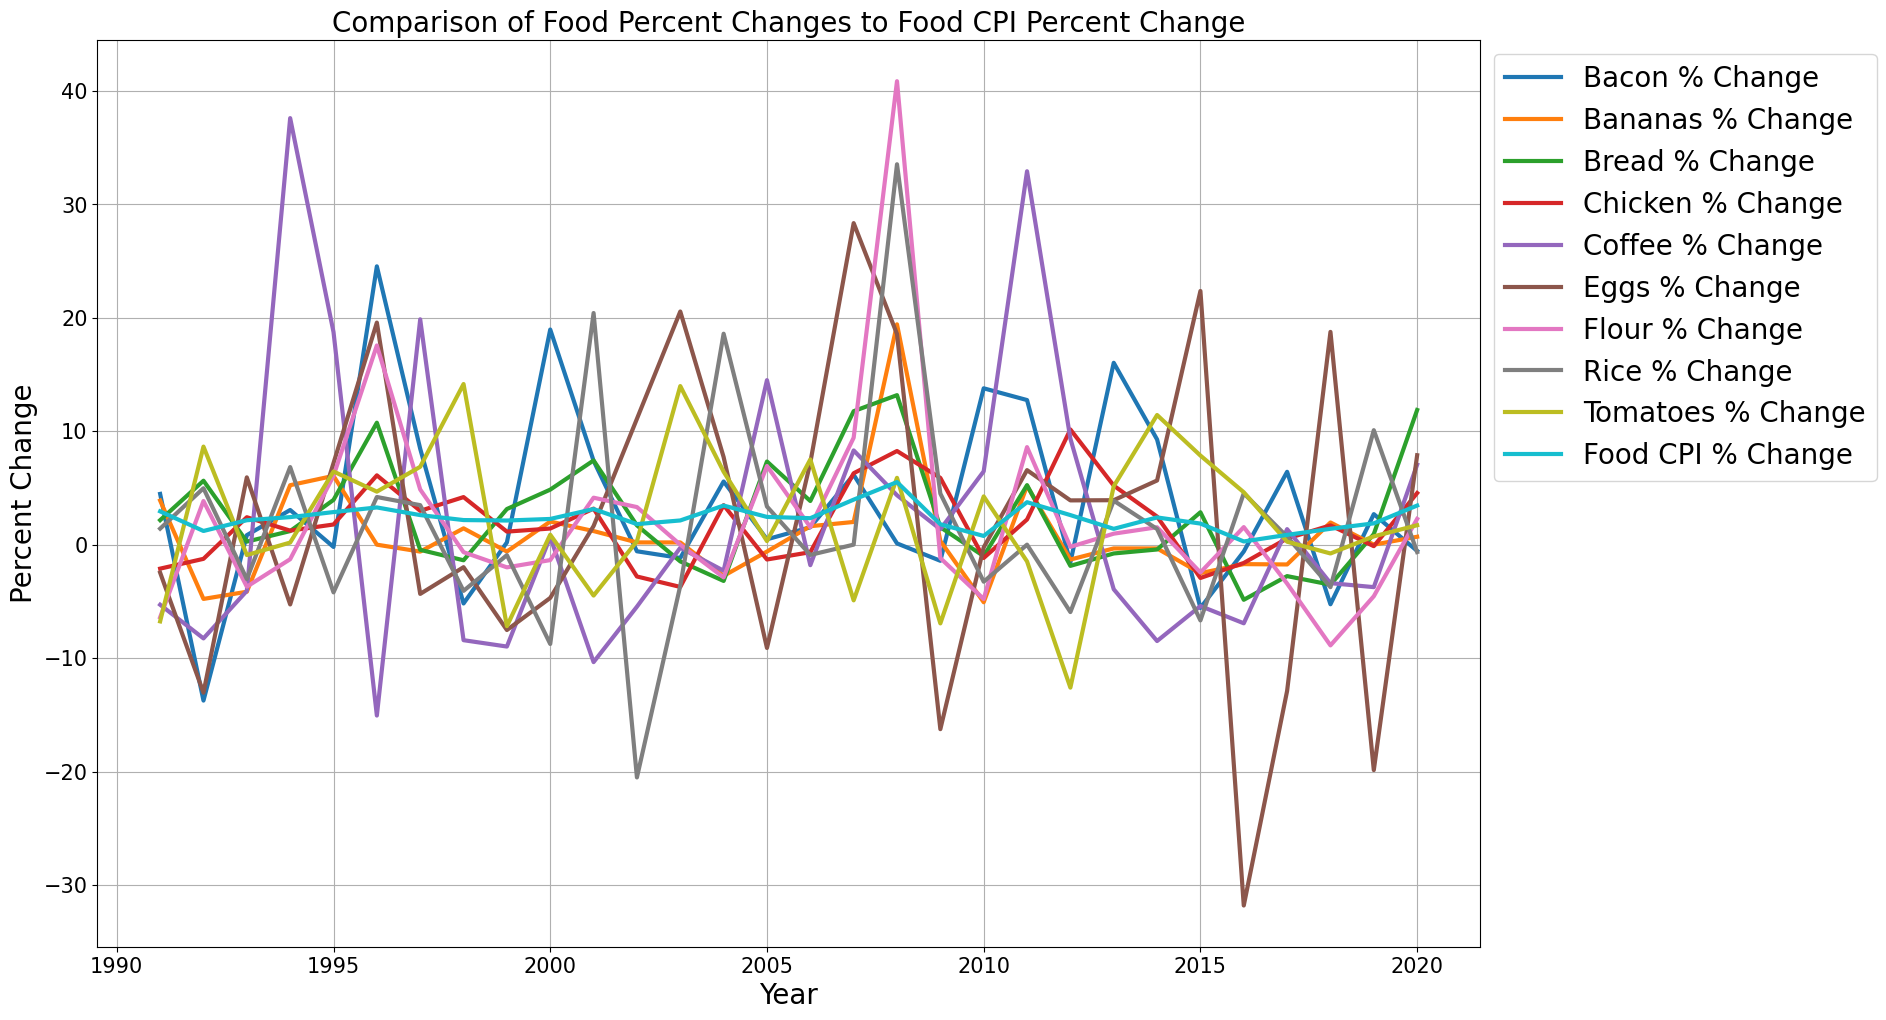

In [ ]:
# The purpose of this function is to plot how each consumer item compares with the Urban Food CPI.
# The function takes in the column to plot and a given title. 
# By doing this, we have a better insight on the stability of our purchasing power
def plot_comparison(columns_to_plot, title):
    
    # Setting the size of the plot
    fig, ax1 = plt.subplots(figsize=(15, 10))
 
    # Setting the x and y labels and the tick paramaters
    ax1.set_xlabel('Year', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylabel('Percent Change', color='black', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    
    # Plot selected columns
    for column in columns_to_plot:
        ax1.plot(percent_changes['Year'], percent_changes[column], label=column, linewidth = 3)

        # Changing the size of the tick marks on the x-axis and the y-axis
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    
    fig.tight_layout()

    # Setting the Legend for the lines
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

    # Setting the title for the graph
    plt.title(title, size = 20)

    # Showing the grid lines
    plt.grid(True)
    plt.show()

columns_to_plot = percent_changes.columns
columns_to_plot = columns_to_plot.drop(['Year', 'USD/CAD % Change', 'USD/MXN % Change',
                                        'Federal.Minimum.Wage % Change', 'Federal.Minimum.Wage.2020.Dollars % Change',
                                        'US_Interest_Rate % Change', 'Gasoline % Change', 'Electricity % Change'])

title = 'Comparison of Food Percent Changes to Food CPI Percent Change'
plot_comparison(columns_to_plot, title)


### Federal Minimum Wage Percent Compared to Urban Food CPI

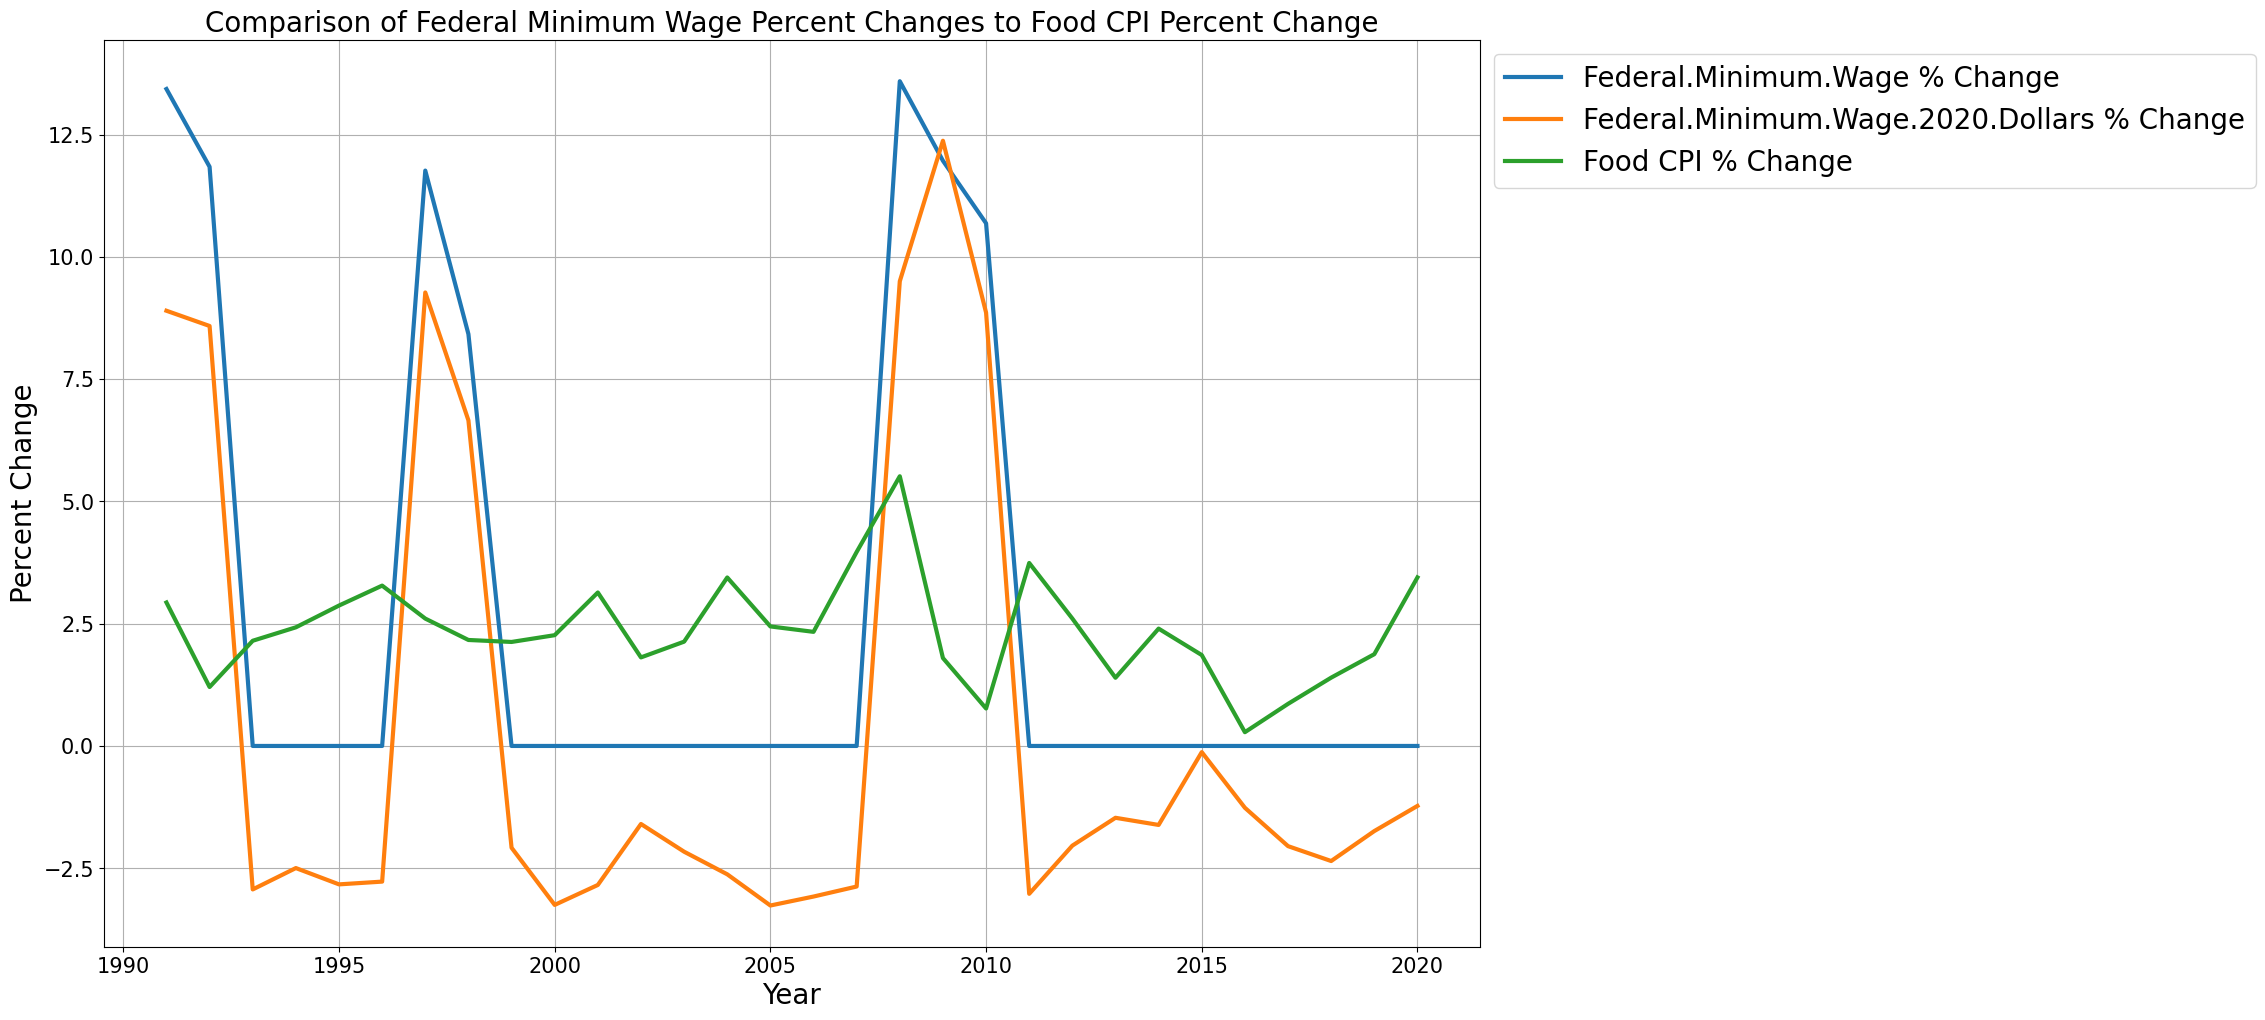

In [ ]:
# The purpose of this function is to plot how the Federal Minimum Wage Percent compares with the Urban Food CPI.
# The function takes in the column to plot and a given title. 
# By doing this, we have a better insight on the stability of our purchasing power
def plot_comparison(columns_to_plot, title):

    # Setting the size of the plot
    fig, ax1 = plt.subplots(figsize=(15, 10))

    # Setting the x and y labels and the tick paramaters
    ax1.set_xlabel('Year', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylabel('Percent Change', color='black', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    
    # Plot selected columns
    for column in columns_to_plot:
        ax1.plot(percent_changes['Year'], percent_changes[column], label=column, linewidth = 3)

        # Changing the size of the tick marks on the x-axis and the y-axis
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    
    fig.tight_layout()

    # Setting the Legend for the lines
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

    # Setting the title for the graph
    plt.title(title, size = 20)

    # Showing the grid lines
    plt.grid(True)
    plt.show()

columns_to_plot = ['Federal.Minimum.Wage % Change', 'Federal.Minimum.Wage.2020.Dollars % Change',
                                          'Food CPI % Change']


title = 'Comparison of Federal Minimum Wage Percent Changes to Food CPI Percent Change'
plot_comparison(columns_to_plot, title)


### Energy Percent Change Compared to Urban Food CPI

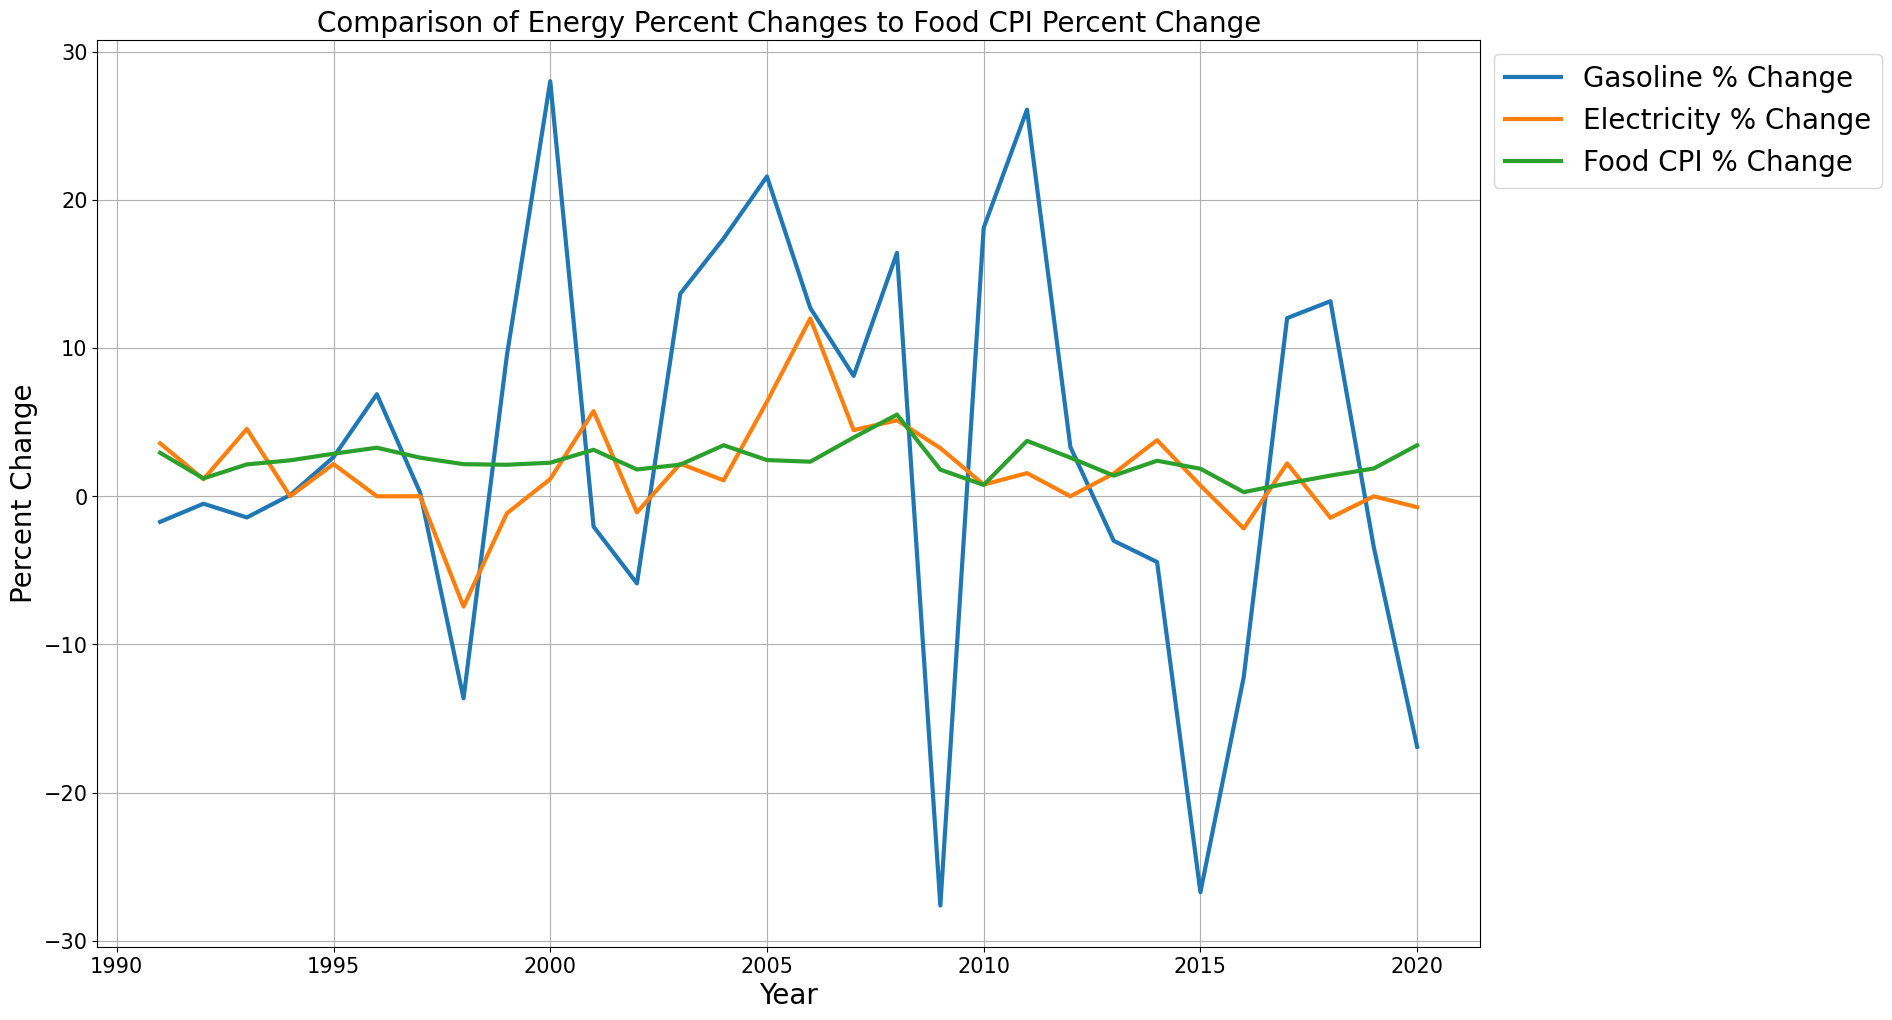

In [ ]:
# The purpose of this function is to plot how different Energy items compare with the Urban Food CPI.
# The function takes in the column to plot and a given title. 
# By doing this, we have a better insight on the stability of our purchasing power
def plot_comparison(columns_to_plot, title):
    
    # Setting the size of the plot
    fig, ax1 = plt.subplots(figsize=(15, 10))
 
    # Setting the x and y labels and the tick paramaters
    ax1.set_xlabel('Year', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylabel('Percent Change', color='black', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    
    # Plot selected columns
    for column in columns_to_plot:
        ax1.plot(percent_changes['Year'], percent_changes[column], label=column, linewidth = 3)

        # Changing the size of the tick marks on the x-axis and the y-axis
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    
    fig.tight_layout()

    # Setting the Legend for the lines
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

    # Setting the title for the graph
    plt.title(title, size = 20)

    # Showing the grid lines
    plt.grid(True)
    plt.show()

columns_to_plot = ['Gasoline % Change', 'Electricity % Change', 'Food CPI % Change']


title = 'Comparison of Energy Percent Changes to Food CPI Percent Change'
plot_comparison(columns_to_plot, title)

### Conversion Rate Percent Change Compared to Urban Food CPI

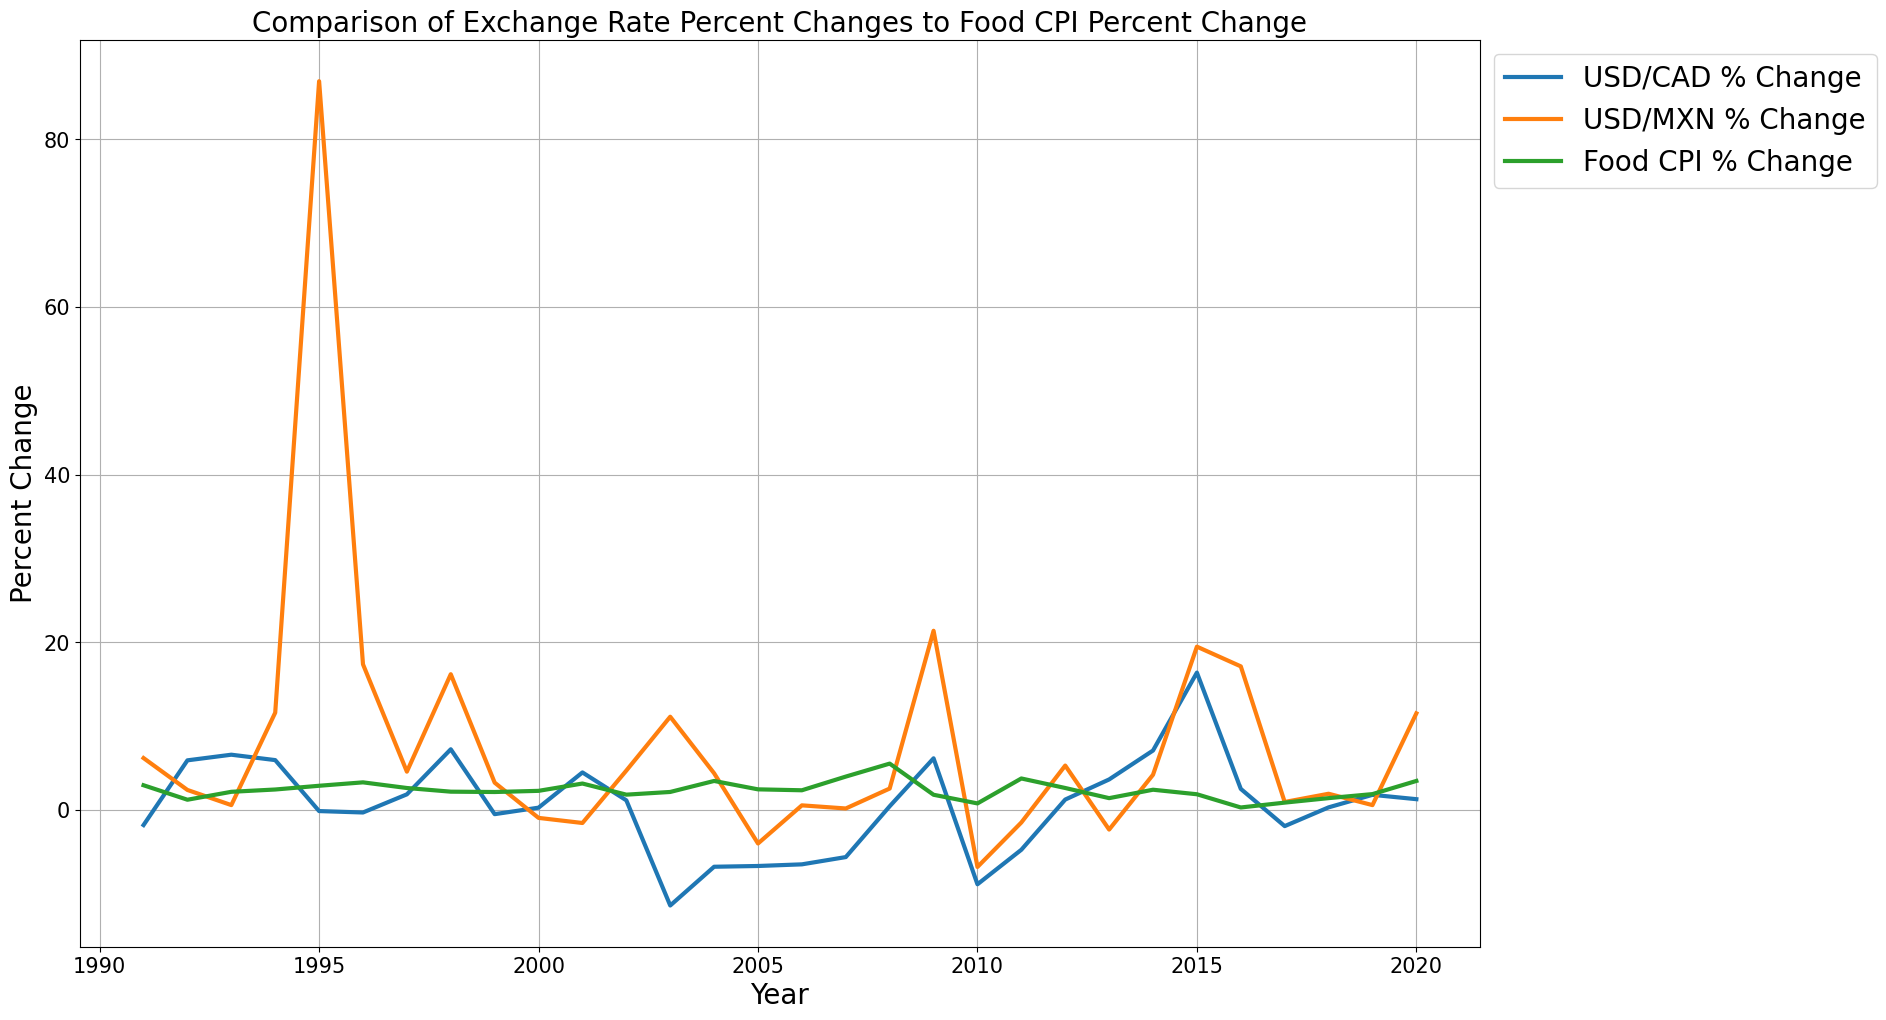

In [ ]:
# The purpose of this function is to plot how each conversion rate compares with the Urban Food CPI.
# The function takes in the column to plot and a given title. 
# By doing this, we have a better insight on the stability of our purchasing power
def plot_comparison(columns_to_plot, title):
    
    # Setting the size of the plot
    fig, ax1 = plt.subplots(figsize=(15, 10))

    # Setting the x and y labels and the tick paramaters
    ax1.set_xlabel('Year', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylabel('Percent Change', color='black', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    
    # Plot selected columns
    for column in columns_to_plot:
        ax1.plot(percent_changes['Year'], percent_changes[column], label=column, linewidth = 3)

        # Changing the size of the tick marks on the x-axis and the y-axis
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    
    fig.tight_layout()

    # Setting the Legend for the lines
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

    # Setting the title for the graph
    plt.title(title, size = 20)

    # Showing the grid lines
    plt.grid(True)
    plt.show()

columns_to_plot = ['USD/CAD % Change', 'USD/MXN % Change', 'Food CPI % Change']


title = 'Comparison of Exchange Rate Percent Changes to Food CPI Percent Change'
plot_comparison(columns_to_plot, title)

### Interest Rate Percent Change Compared to Urban Food CPI

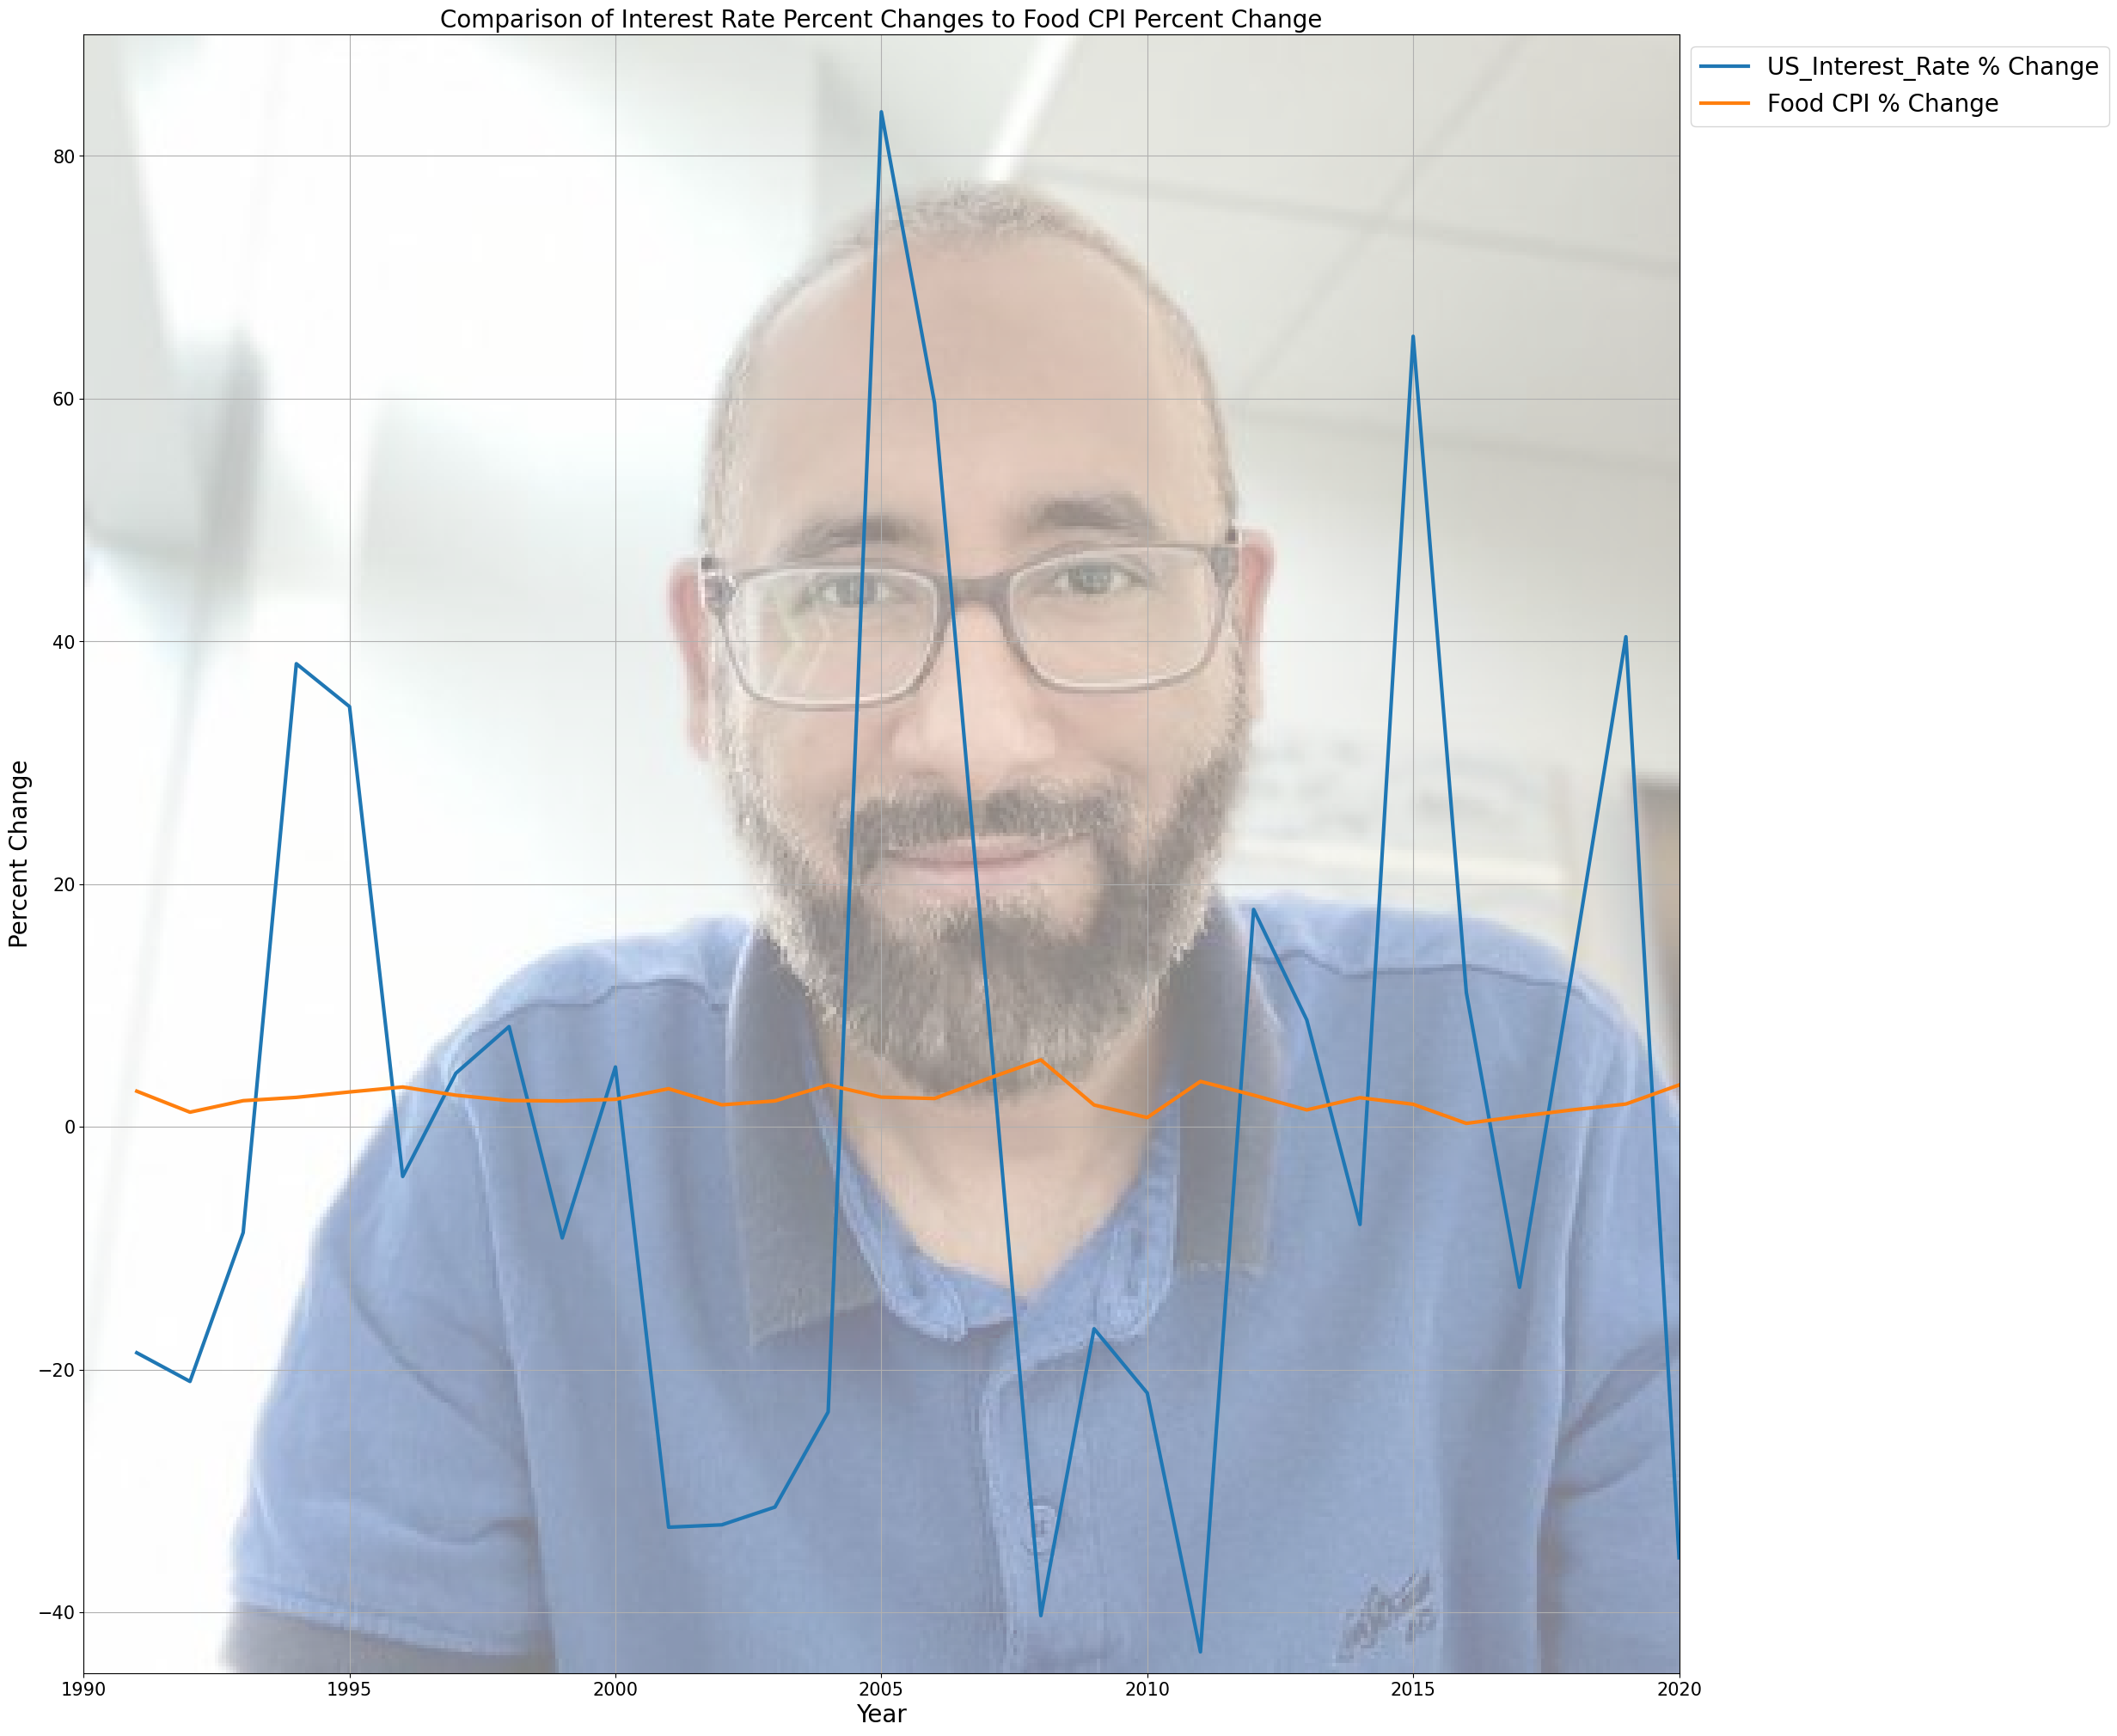

In [ ]:
# The purpose of this function is to plot how each Interest Rate Percent Change compares with the Urban Food CPI.
# The function takes in the column to plot and a given title. 
# By doing this, we have a better insight on the stability of our purchasing power
import matplotlib.image as mpimg
bg_image = mpimg.imread('/work/Mr_Teli.jpeg')
def plot_comparison(columns_to_plot, title):
    
    # Setting the size of the plot
    fig, ax1 = plt.subplots(figsize=(20, 20))

    # Setting the x and y labels and the tick paramaters
    ax1.set_xlabel('Year', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylabel('Percent Change', color='black', size = 20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_aspect(bg_image.shape[1] / bg_image.shape[0])
    ax1.imshow(bg_image, alpha = .5, aspect='auto', extent = [1990,2020,-45,90])

    # Plot selected columns
    for column in columns_to_plot:
        ax1.plot(percent_changes['Year'], percent_changes[column], label=column, linewidth = 3)

        # Changing the size of the tick marks on the x-axis and the y-axis
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    
    fig.tight_layout()

    # Setting the Legend for the lines
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

    # Setting the title for the graph
    plt.title(title, size = 20)

    # Showing the grid lines
    plt.grid(True)
    plt.show()

columns_to_plot = ['US_Interest_Rate % Change', 'Food CPI % Change']


title = 'Comparison of Interest Rate Percent Changes to Food CPI Percent Change'
plot_comparison(columns_to_plot, title)

From these plots, we can see that the price of some consumer items increase, fluctuate frequently throughout the years, or remain somewhat stagnant with barely any change. Surprisingly, the line of yearly average price for bananas and rice is pretty flat, while the yearly average price of bacon rose steadily.

# Analysis, Hypothesis Testing, and Machine Learning 

To further analyze the data, we will create a linear regression model to predict the Food CPI using all the other columns/features (excluding year). Let's first take a look at the OLS regression results

In [ ]:
# First we'll rename the column names since there are special characters in the main dataframe, which statsmodel
# won't be able to process.
percent_changes_copy = percent_changes.copy().rename(columns={
    "Food CPI % Change": "Food_CPI",
    "Bacon % Change": "Bacon_Change",
    "Gasoline % Change": "Gasoline_Change",
    "Bananas % Change": "Bananas_Change",
    "Electricity % Change": "Electricity_Change",
    "Bread % Change": "Bread_Change",
    "Chicken % Change": "Chicken_Change",
    "Coffee % Change": "Coffee_Change",
    "Eggs % Change": "Eggs_Change",
    "Flour % Change": "Flour_Change",
    "Rice % Change": "Rice_Change",
    "Tomatoes % Change": "Tomatoes_Change",
    "USD/CAD % Change": "USD_CAD_Change",
    "USD/MXN % Change": "USD_MXN_Change",
    "Federal.Minimum.Wage % Change": "Federal_Minimum_Wage_Change",
    "US_Interest_Rate % Change": "US_Interest_Rate_Change"
})

# Update the formula with the renamed columns
formula = "Food_CPI ~ Bacon_Change + Gasoline_Change + Bananas_Change + Electricity_Change + Bread_Change + Chicken_Change + \
       Coffee_Change + Eggs_Change + Flour_Change + Rice_Change + Tomatoes_Change + USD_CAD_Change + \
       USD_MXN_Change + Federal_Minimum_Wage_Change + US_Interest_Rate_Change"

reg = smf.ols(formula=formula, data=percent_changes_copy).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Food_CPI   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4.789
Date:                Mon, 21 Aug 2023   Prob (F-statistic):            0.00279
Time:                        03:19:58   Log-Likelihood:                -16.597
No. Observations:                  30   AIC:                             65.19
Df Residuals:                      14   BIC:                             87.61
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.9094      0.226      8.434      0.000       1.424       2.395
Bacon_Change                   -0.0016      0.017     -0.095      0.925      -0.038       0.035
Gasoline_Change                 0.0003      0.015      0.022      0.983      -0.032       0.032
Bananas_Change                  0.0636      0.044      1.432      0.174      -0.032       0.159
Electricity_Change              0.0006      0.044      0.014      0.989      -0.093       0.095
Bread_Change                    0.0822      0.038      2.159      0.049       0.001       0.164
Chicken_Change                  0.0606      0.050      1.211      0.246      -0.047       0.168
Coffee_Change                   0.0116      0.011      1.055      0.309      -0.012       0.035
Eggs_Change                     0.0253      0.012      2.179      0.047       0.000       0.050
Flour_Change                   -0.0141      0.028     -0.510      0.618      -0.073       0.045
Rice_Change                     0.0285      0.018      1.618      0.128      -0.009       0.066
Tomatoes_Change                -0.0019      0.025     -0.076      0.941      -0.056       0.052
USD_CAD_Change                 -0.0125      0.032     -0.390      0.702      -0.081       0.056
USD_MXN_Change                  0.0018      0.009      0.209      0.837      -0.017       0.020
Federal_Minimum_Wage_Change    -0.0044      0.027     -0.161      0.875      -0.063       0.054
US_Interest_Rate_Change        -0.0027      0.004     -0.625      0.542      -0.012       0.007
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.364
Skew:                          -0.232   Prob(JB):                        0.834
Kurtosis:                       2.724   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We excluded the Federal Minimum Wage 2020 data since we wanted to avoid repetition and how it affected our results. From the summary above, we see that R-squared and Adj. R-squared values are 0.837 and 0.662 respectively. With an adjusted R-squared  rate of 0.662, it indicates that all the predictors are taken into account of measuring variance (which is 66.2%). The probability of the F-statistic is also low and almost near 0, which indicates strong evidence of rejecting the null hypothesis.

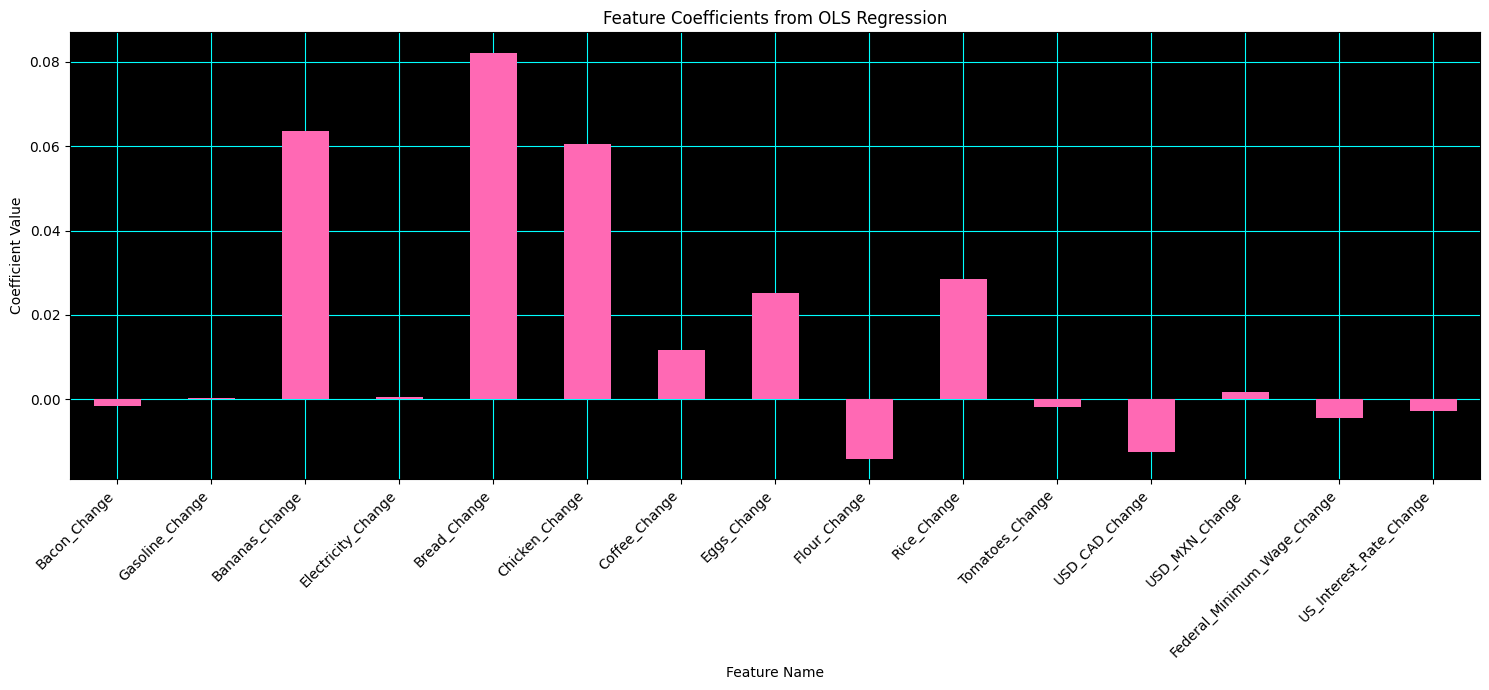

In [ ]:
# Extract coefficients from OLS regression results
coefficients = reg.params[1:]  # Exclude intercept

# Extract feature names
features = coefficients.index

# Create a bar graph for coefficients
plt.figure(figsize=(15,7))
plt.gca().set_facecolor('black')
coefficients.plot(kind='bar', color='hotpink', zorder = 2)
plt.grid(color='#00FFFF', zorder = 1)
plt.title('Feature Coefficients from OLS Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature Name')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', zorder = 1, color = '#00FFFF')

# Show plot
plt.tight_layout()
plt.show()

This bar graph above gives us a visual representation of the correlation of each coefficients for every feature. By examining the coefficients, we can observe which features have a positive or negative effect on Food CPI and how impactful it is. Additionally, we can do comparative analysis to see which feature coefficients have more impact when compared to others. For example, we noticed that the bread percentage change feature had a high coefficient value; more than double the value for the rice percentage change

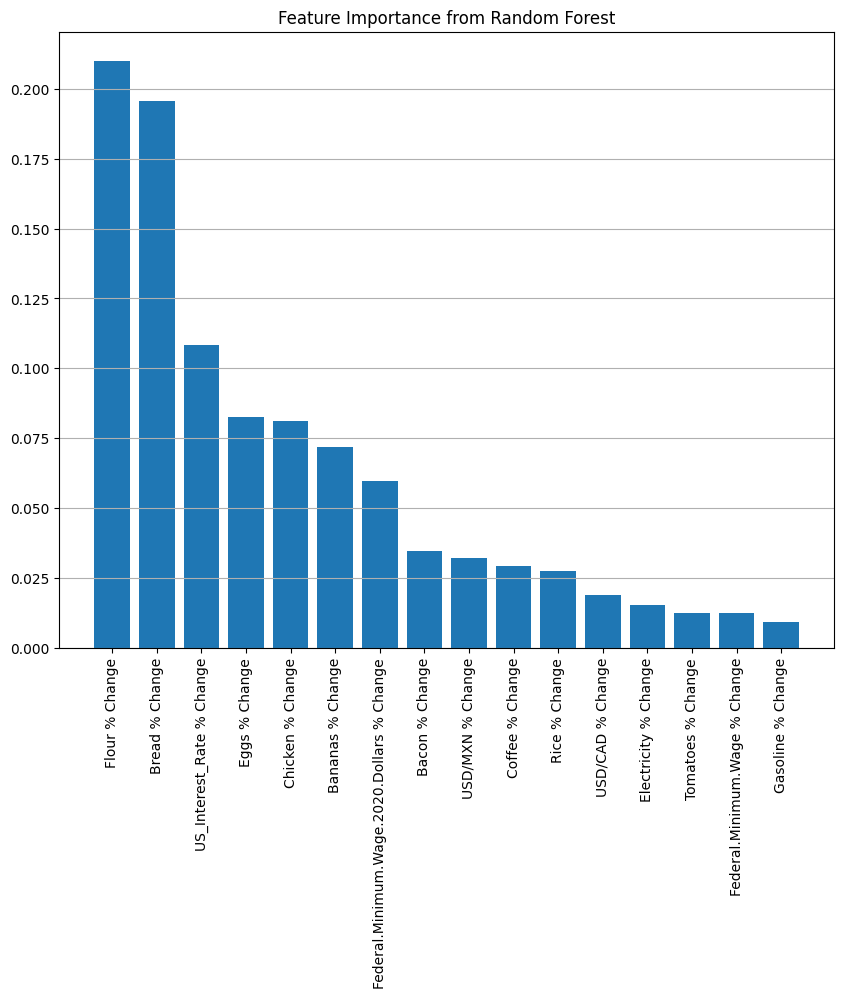

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
X = percent_changes.drop(columns=['Year', 'Food CPI % Change'])
Y = percent_changes['Food CPI % Change']
rf.fit(X, Y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order and get indices
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create bar plot

plt.figure(figsize=(10, 8))
plt.grid(axis='y')
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


Instead of relying on the OLS summary, we can achieve a bar plot of feature importance using RandomForestRegressor to get a more stable and accurate prediction of feature importance. By comparing the feature importance from both the OLS summary and Random Forests, we can get a more complete view of which features are the most impactful when it comes to predicting Food CPI. As seen in the plot, "Flour % Change" appears to have the highest feature importance, followed by "Bread % Change". 

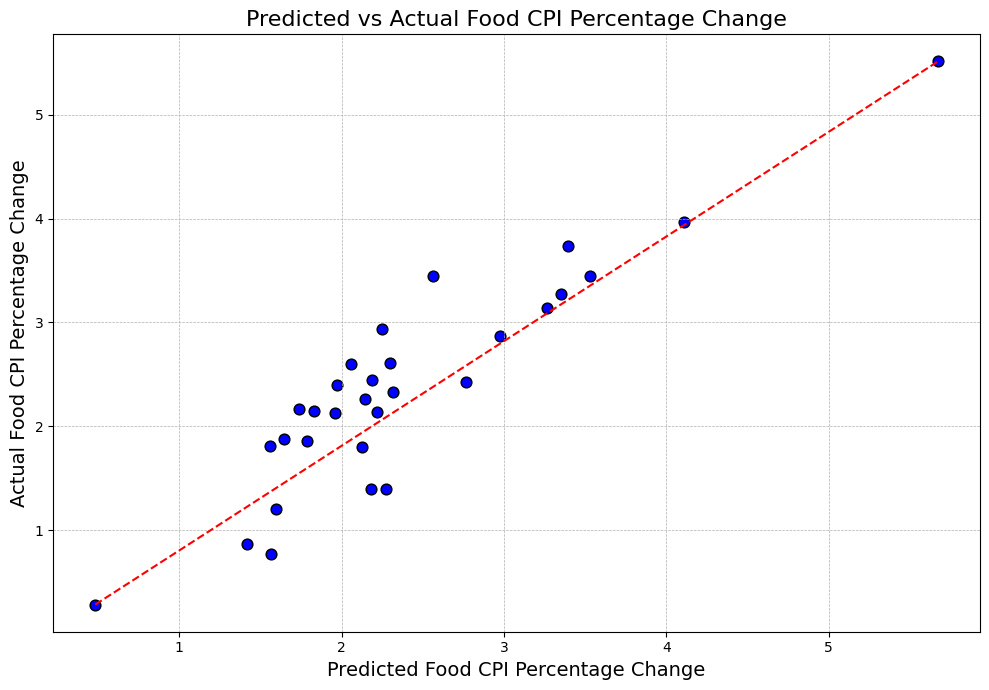

In [ ]:
# Plot configurations
plt.figure(figsize=(10, 7))
plt.scatter(reg.fittedvalues, percent_changes_copy["Food_CPI"], color='blue', edgecolor='k', s=60)
plt.plot([min(reg.fittedvalues), max(reg.fittedvalues)], 
         [min(percent_changes_copy["Food_CPI"]), max(percent_changes_copy["Food_CPI"])], color='red', linestyle='--')
plt.title('Predicted vs Actual Food CPI Percentage Change', fontsize=16)
plt.xlabel('Predicted Food CPI Percentage Change', fontsize=14)
plt.ylabel('Actual Food CPI Percentage Change', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Insight and Conclusion

Using a linear regression model we were able to predict the values of the Food CPI changes.  We were also able to conclude the strength of the relationship between food CPI and various features.  Through our analysis, we were able to find that bread and bananas had the largest impact on food CPI.  But, these are foods so it would be clear that they played a large role in the food CPI.  Of the non-food features we included we found that USD/CAD had the largest impact on food CPI, and by quite a large margin as well.  From this, we can see that broader economic forces, beyond just direct food price changes, play a pivotal role in shaping food CPI.

While interpreting data from multiple, seemingly unrelated, sources and fields may be difficult for humans, for a computer this task is very doable.   From this tutorial we were able to successfully find and test features that played a significant role in the food CPI using data collection, data cleaning, data joining, data visualization, and data analysis.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42a5c832-cfea-4e63-9708-c4fa573a6720' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>